# Figure 3

In [2]:
# Section 1: Import Libraries
import numpy as np  # numerical arrays and math
import matplotlib.pyplot as plt  # plotting
from scipy.optimize import curve_fit  # curve fitting
import itertools  # misc iteration helpers (optional)
import matplotlib.patches as mpatches  # shapes/annotation utilities (optional)
import os  # filesystem paths

In [3]:
# Section 2: Load Linear Chain Density, Cumulative, and Rings Length Datasets
colors = {}  # per-n color map for n={1,2,5,10,20}
colors[1] = 'tab:blue'
colors[2] = 'tab:orange'
colors[5] = 'tab:green'
colors[10] = 'tab:red'
colors[20] = 'tab:purple'

# Linear chain density distributions (adaptive binnings)
nlins1 = [1, 2, 5, 10, 20]
data_linear_density = {}
for nlin in nlins1:
    data_linear_density[nlin] = np.loadtxt(f"linear_density_distribution_100x100x100_{nlin}linear_adaptive_binning.dat")

# Cumulative distributions for one-chain length
nlins2 = [2, 5, 10, 20]
data_cumulative = {}
for nlin in nlins2:
    data_cumulative[nlin] = np.loadtxt(f"cumulative_distribution_one_length_100x100x100_{nlin}linear_density_90%_91%.dat")

# Rings length distribution
nlins3 = [1, 2, 5, 10, 20]
data_rins_length = {}
for nlin in nlins3:
    data_rins_length[nlin] = np.loadtxt(f"rings_length_distribution_100x100x100_{nlin}linear.dat")

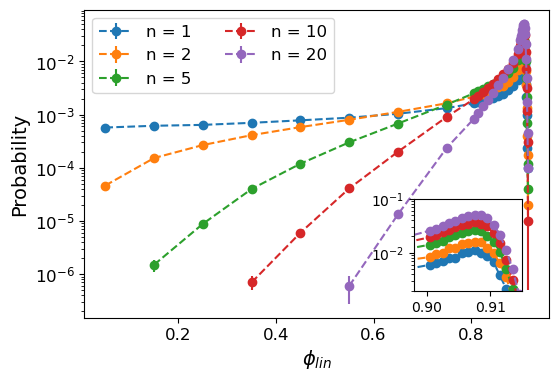

In [4]:
# Section 3: Plot Linear Chain Density Distribution with Zoomed Inset
plt.figure(figsize=(6, 4))
for nlin in nlins1:
    # Bin centers from left/right edges
    x = 0.5*(data_linear_density[nlin][:, 0] + data_linear_density[nlin][:, 1])
    y = data_linear_density[nlin][:, 2]  # probability
    y_err = data_linear_density[nlin][:, 3]  # errorbars
    plt.errorbar(x, y, yerr=y_err, fmt='--o', color=colors[nlin], label=f'n = {nlin}')
plt.yscale('log')
plt.xlabel(r'$\phi_{lin}$', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.legend(fontsize=12, ncol=2)

# Inset: zoom near the high-density region
plt.axes([0.675, 0.178, 0.18, 0.23])
for nlin in nlins1:
    x = 0.5*(data_linear_density[nlin][:, 0] + data_linear_density[nlin][:, 1])
    y = data_linear_density[nlin][:, 2]
    y_err = data_linear_density[nlin][:, 3]
    plt.errorbar(x, y, yerr=y_err, fmt='--o', color=colors[nlin], label=f'{nlin} linear chains')
plt.xlim(0.898, 0.915); plt.ylim(2e-3, 1e-1)
plt.yscale('log')
plt.savefig('linear_chain_density_distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()

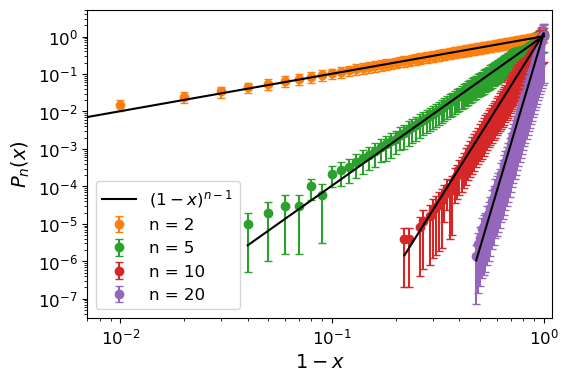

In [5]:
# Section 4: Fit Cumulative Distributions P_n(x) and Plot for Multiple n
def linear_function(x,a):
    return a*x  # proportionality fit

plt.figure(figsize=(6,4))
popt = {}
pcov = {}
for nlin in nlins2[:-1]:
    # Data for this n
    data = data_cumulative[nlin]
    x = data[:,0]  # 1-x
    y = data[:,1]  # P_n(x)
    y_err = data[:,2]
    # Plot data
    plt.errorbar(x, y, yerr=y_err, label=f'n = {nlin}', marker='o', color=colors[nlin],  linestyle='None', capsize=3, zorder=-1)
    # Fit y ~ a * [n*(1-x)^{n-1}]
    x_fit = np.linspace(min(x), max(x), 100)
    popt[nlin], pcov[nlin] = curve_fit(linear_function, nlin*x**(nlin-1), y, p0=[1])
    plt.plot(x_fit, linear_function(nlin*x_fit**(nlin-1), *popt[nlin]), color='k', linestyle='-')
nlin = nlins2[-1]  # last n without explicit separate handling
data = data_cumulative[nlin]
x = data[:,0]
y = data[:,1]
plt.errorbar(x, y, yerr=data[:,2], label=f'n = {nlin}', marker='o', color=colors[nlin], linestyle='None', capsize=3, zorder=-1)
x_fit = np.linspace(min(x), max(x), 100)
popt[nlin], pcov[nlin] = curve_fit(linear_function, nlin*x**(nlin-1), y, p0=[1])
plt.plot(x_fit, linear_function(nlin*x_fit**(nlin-1), *popt[nlin]), color='k', linestyle='-', label=r'$(1-x)^{n-1}$')
plt.legend(loc='lower left', fontsize=12)
plt.xlabel(r'$1-x$', fontsize=14)
plt.ylabel(r'$P_n(x)$', fontsize=14)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.xlim(7*10**-3, 1.1)
plt.xscale('log'); plt.yscale('log')
plt.savefig('cumulative_distribution_linear_chains.pdf', dpi=300, bbox_inches='tight')
plt.show()

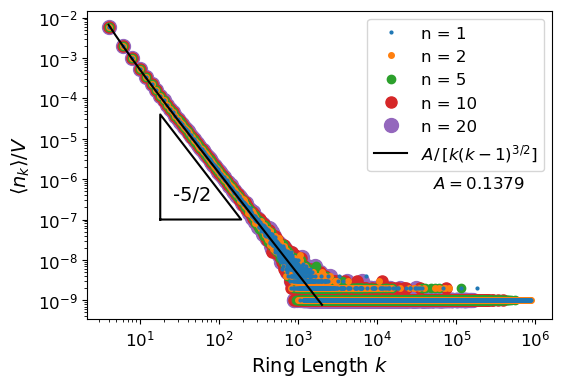

In [23]:
# Section 5: Plot Rings Length Distribution and Indicate -5/2 Slope
plt.figure(figsize=(6,4))
i = 2  # increasing marker size for visual separation
for nlin in nlins3:
    x = data_rins_length[nlin][:, 0]  # ring length
    y = data_rins_length[nlin][:, 1]  # <n_k>/V
    y_err = data_rins_length[nlin][:, 2]
    plt.plot(x, y, 'o', markersize=i, label=f'n = {nlin}', color=colors[nlin], zorder=-nlin)
    i += 2

x=np.linspace(min(x), 2e3, 100000)
y=0.1379/(x*(x-1)**1.5)
plt.plot(x, y, 'k', label=r'$A/\,[k(k-1)^{3/2}]$')
plt.text(5e4, 6e-7, r'$A = 0.1379$', fontsize=12)
# Slope guide triangle to indicate ~k^{-5/2}
plt.plot([18, 190, 18, 18], [1e-7, 1e-7, 4e-5, 1e-7], 'k')
plt.text(26, 3e-7, r'-5/2', fontsize=14)
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'Ring Length $k$', fontsize=14)
plt.ylabel(r'$\langle n_k \rangle/V$', fontsize=14)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('rings_length_distribution.pdf', dpi=300, bbox_inches='tight')
plt.show()